In [7]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(" xtrain = ", x_train[0])

(60000, 28, 28)
 xtrain =  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219

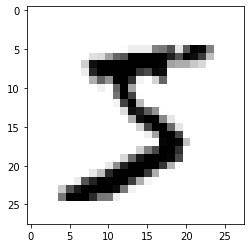

5


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

print(y_train[0])    

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

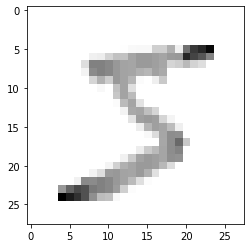

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2649 - acc: 0.9227
Epoch 2/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1073 - acc: 0.9665
Epoch 3/3
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0736 - acc: 0.9770


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0972 - acc: 0.9701
0.0971972961881198
0.9701


In [12]:
model.save('kerasNN.model')
new_model = tf.keras.models.load_model('kerasNN.model')
predictions = new_model.predict(x_test)
print(predictions)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[[8.29844282e-09 1.31810694e-07 2.03876016e-06 ... 9.99994993e-01
  7.84173171e-09 4.04142725e-07]
 [1.24764583e-07 3.62813449e-03 9.96262848e-01 ... 8.02542459e-08
  7.71069665e-07 7.74136588e-10]
 [3.69839093e-08 9.99945164e-01 2.31580475e-06 ... 2.06045534e-05
  3.00465963e-05 1.13795544e-07]
 ...
 [2.84289889e-08 9.39537301e-07 2.71926606e-08 ... 3.83830557e-05
  5.70711836e-06 8.65111651e-05]
 [2.48735996e-05 1.30638991e-05 5.21408026e-07 ... 6.21512709e-06
  2.47193454e-03 1.68692615e-08]
 [3.45609322e-07 3.37103634e-09 6.40316999e-09 ... 6.80698886e-10
  2.06801349e-08 1.33480366e-10]]


7


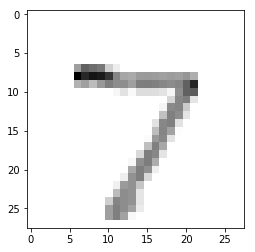

In [0]:
import numpy as np
print(np.argmax(predictions[0]))
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()